In [50]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
df = pd.read_csv('../data/video_game_sales.csv')
df.columns = df.columns.str.strip()
# df['Total Fat (g)'] = df['Total Fat (g)'].str.replace(' ', '.').astype(float)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df = df.dropna()  # Remove nulls/NaNs
df

,index,Rank,Game_Title,Platform,Year,Genre,Publisher,North_America,Europe,Japan,Rest_of_World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [52]:
df.describe()

,index,Rank,Year,North_America,Europe,Japan,Rest_of_World,Global,Review
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,950.716720,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243
std,550.234127,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,474.250000,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,950.500000,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000
75%,1426.750000,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000
max,1906.000000,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


Text(0, 0.5, 'Country')

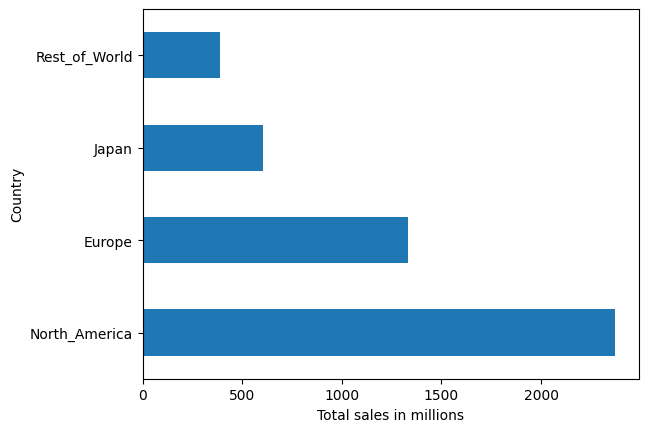

In [53]:
df[['North_America', 'Europe', 'Japan', 'Rest_of_World']].sum().plot(kind='barh')
plt.xlabel('Total sales in millions')
plt.ylabel('Country')

North America commands more video game sales than the rest of the world combined, with about 2.5 billion sales.

Text(0, 0.5, 'Sales in millions of USD')

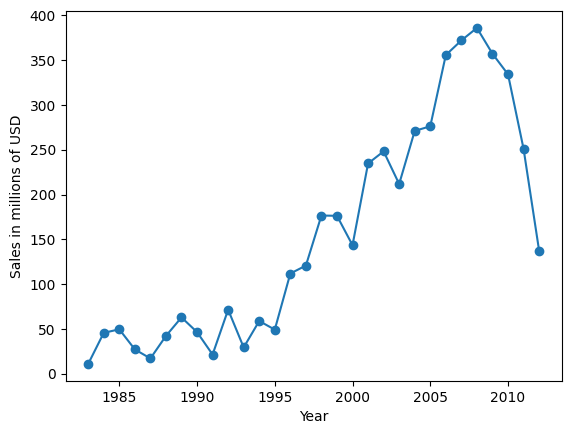

In [54]:
df.groupby('Year')['Global'].sum().plot(kind='line', marker='o')
plt.ylabel('Sales in millions of USD')

Global Sales steadily rise throughout the decades with regular ebbs and flows, but after the peak in 2007-2008 video game sales begin to rapidly decrease.

<Axes: ylabel='Platform'>

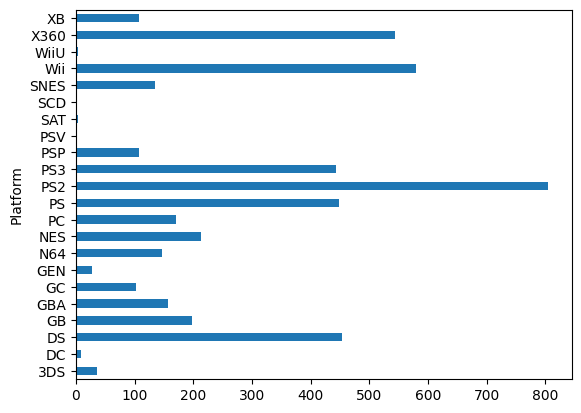

In [55]:
df.groupby('Platform')['Global'].sum().plot(kind='barh')

PlayStation commands the most global sales total, but is rivaled by the Wii and XBox.

<Axes: xlabel='Global', ylabel='Review'>

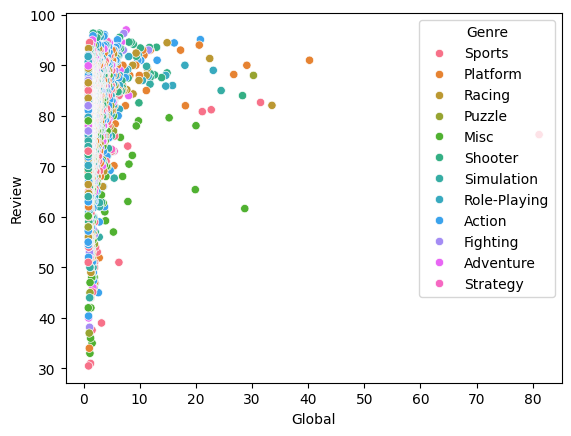

In [56]:
sns.scatterplot(x='Global', y='Review', data=df, hue='Genre')

A high review generally means higher global sales.

<Axes: xlabel='Year', ylabel='Publisher'>

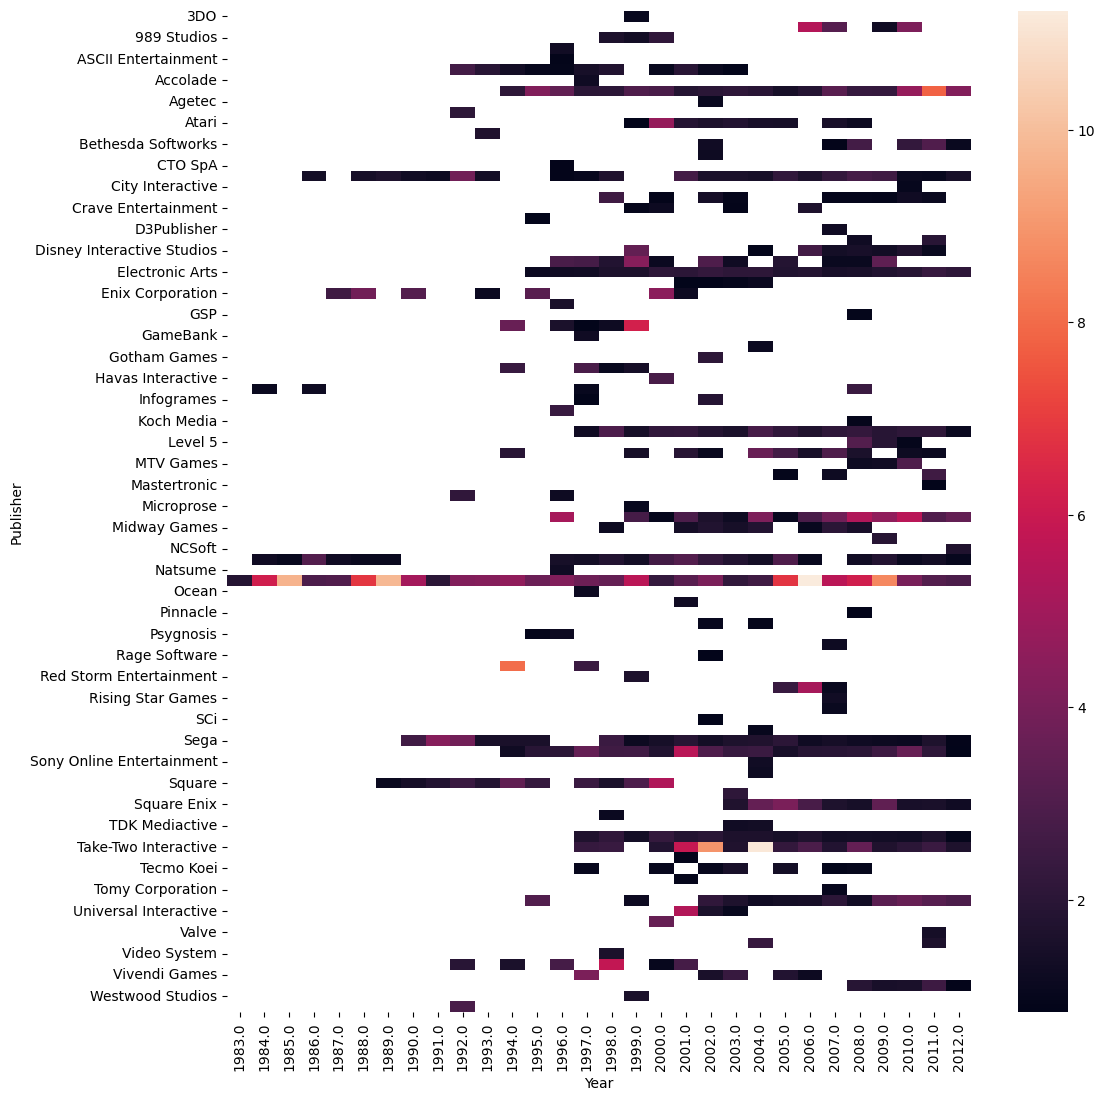

In [57]:

plt.figure(figsize=(12, 13))
sns.heatmap(df.pivot_table(values='Global', columns='Year', index='Publisher'))

Some companies release many more games than other companies. Companies such as Valve have very few game releases.